# Round 2

## Importing the libraries 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Read the train and test datasets 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
df_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


## Check missing values in train and test datasets 

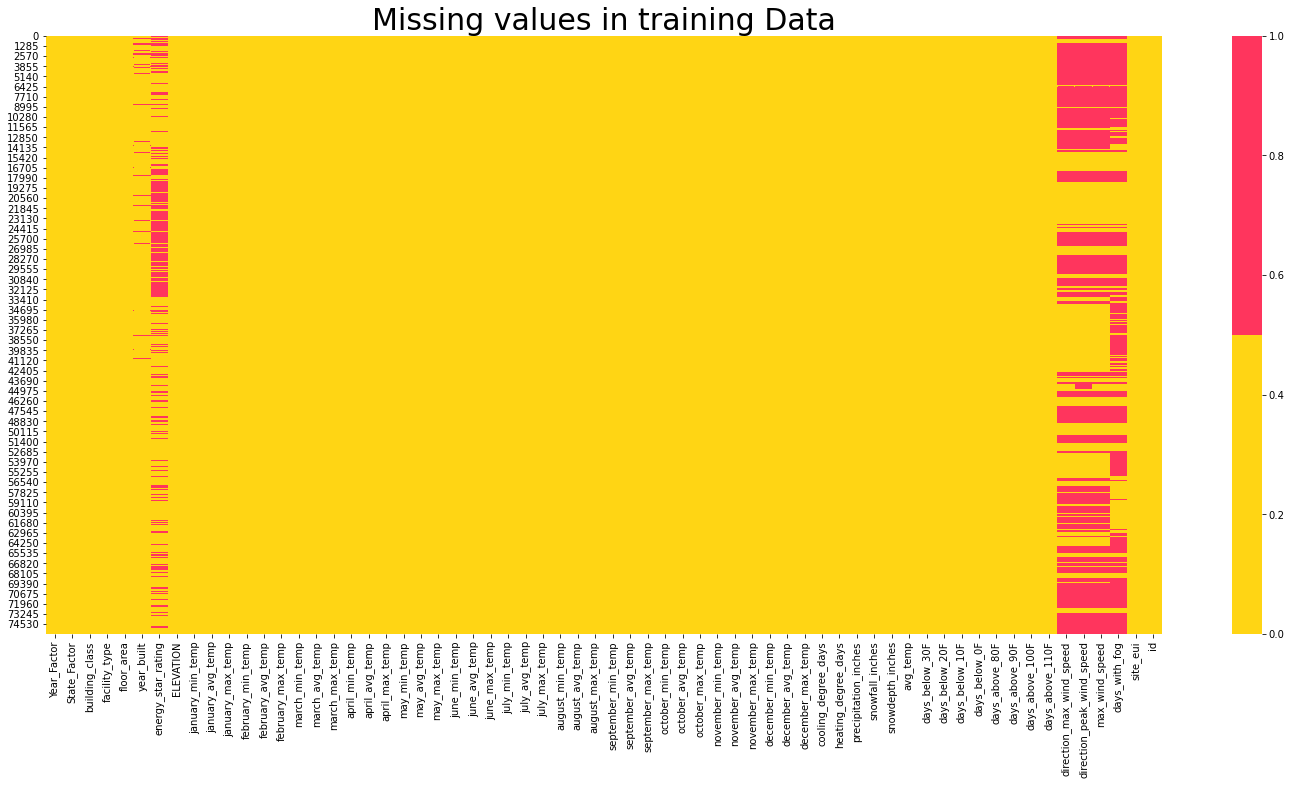

In [5]:
plt.figure(figsize = (25,11))
sns.heatmap(df_train.isna().values, cmap = ['#ffd514','#ff355d'], xticklabels=df_train.columns)
plt.title("Missing values in training Data", size=30);

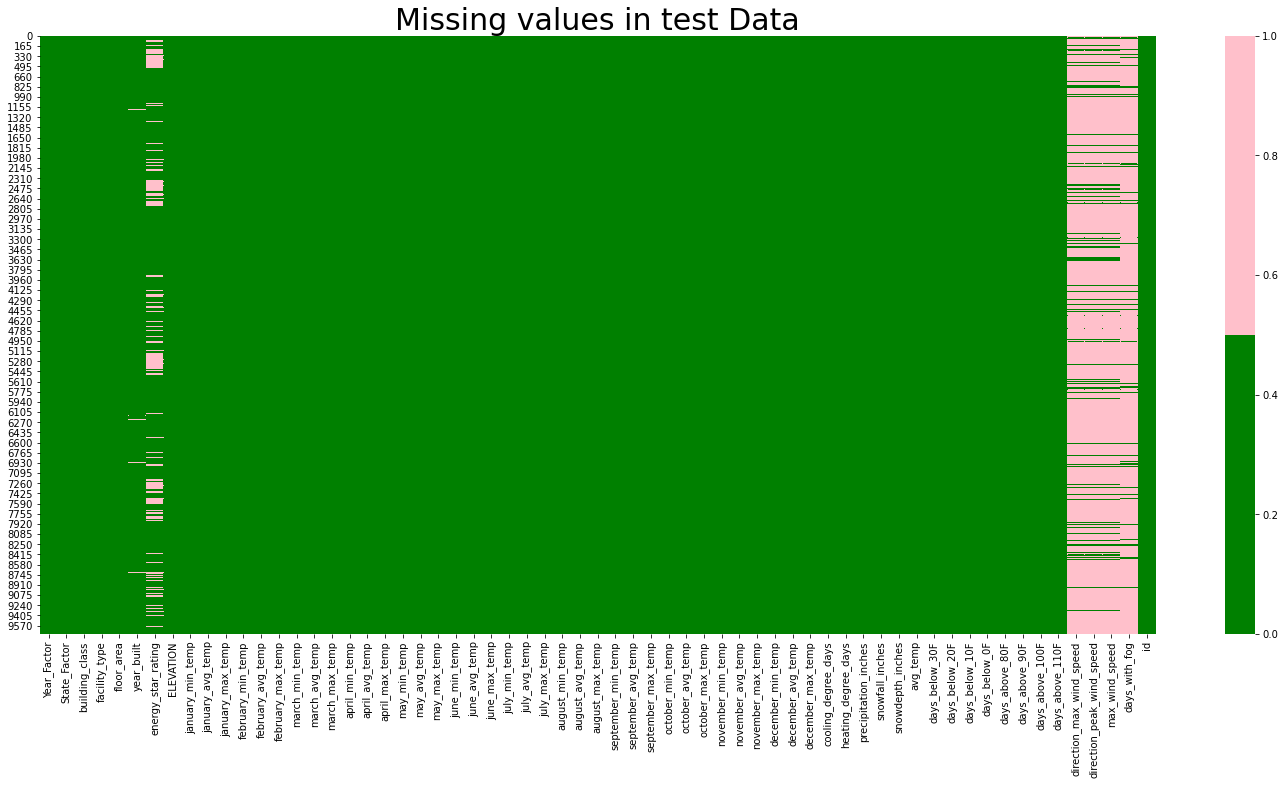

In [6]:
plt.figure(figsize = (25,11))
sns.heatmap(df_test.isna().values, cmap = ['green','pink'], xticklabels=df_test.columns)
plt.title("Missing values in test Data", size=30);

In [7]:
missing_columns = [col for col in df_train.columns if df_train[col].isnull().any()]
missingvalues_count = df_train.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Training Set Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df .style.background_gradient(cmap="Pastel1") 

,Training Set Null Values Count
year_built,1837
energy_star_rating,26709
direction_max_wind_speed,41082
direction_peak_wind_speed,41811
max_wind_speed,41082
days_with_fog,45796


In [8]:
missing_columns_test = [col for col in df_test.columns if df_test[col].isnull().any()]
missingvalues_count_test = df_test.isna().sum()
missingValues_df_test = pd.DataFrame(missingvalues_count_test.rename('Test Set Null Values Count')).loc[missingvalues_count_test.ne(0)]
missingValues_df_test .style.background_gradient(cmap="Pastel1")

,Test Set Null Values Count
year_built,92
energy_star_rating,2254
direction_max_wind_speed,8575
direction_peak_wind_speed,8575
max_wind_speed,8575
days_with_fog,9117


## Numerical and Categorical values 

In [9]:
categorical_features = ['State_Factor', 'building_class', 'facility_type']
numerical_features= [cols for cols in df_train.columns if cols not in categorical_features]

## Distribution of Categorical Features 

In [10]:
def countplot_features(df, feature, title, color):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
           
    plt.figure(figsize = (10, 5))
    
    sns.countplot(df[feature], color = color)
        
    plt.title(title, fontsize=15)
    plt.xticks(rotation=90)
    plt.show();

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


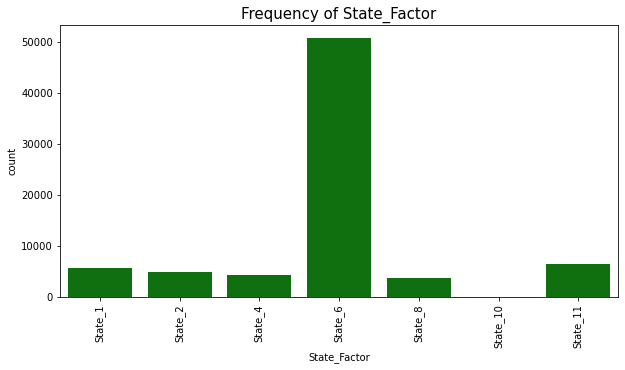

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


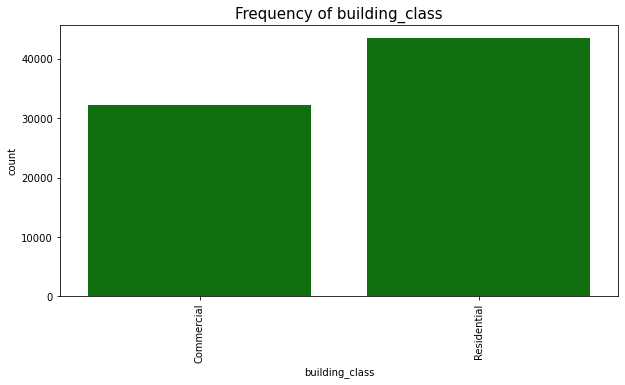

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


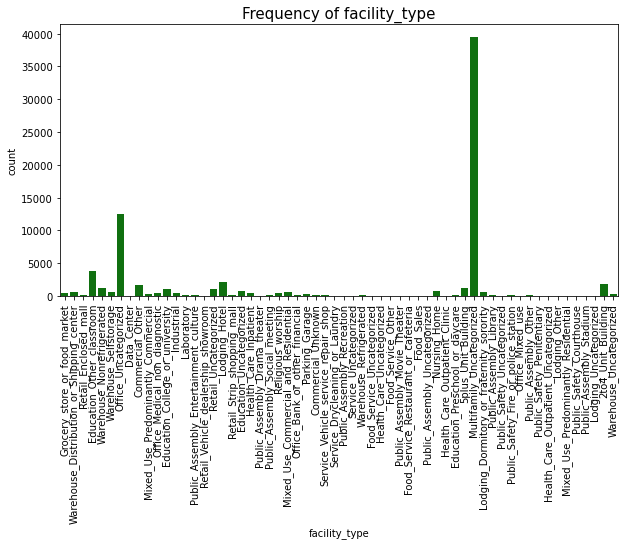

In [11]:
# plot distributions of categorical features
for feature in categorical_features:
    fig = countplot_features(df_train, feature=feature, title = "Frequency of "+ feature, color='green')

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


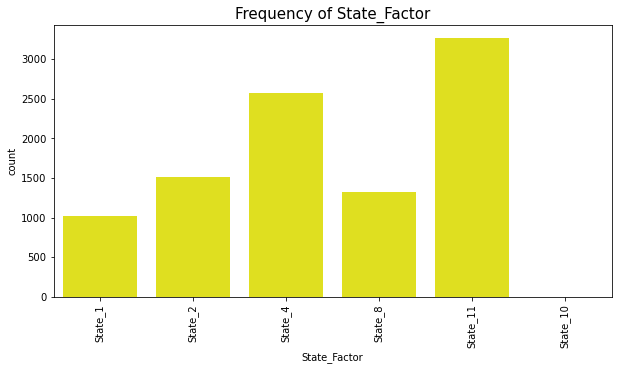

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


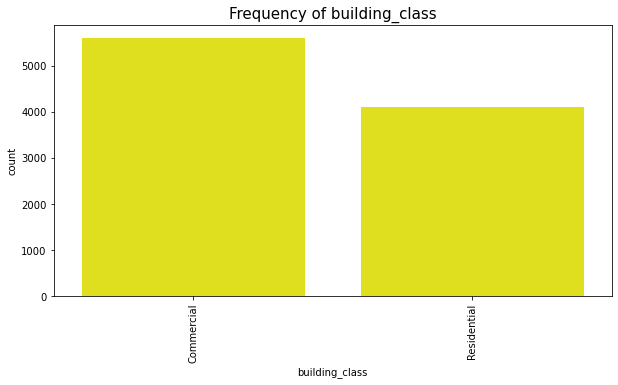

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


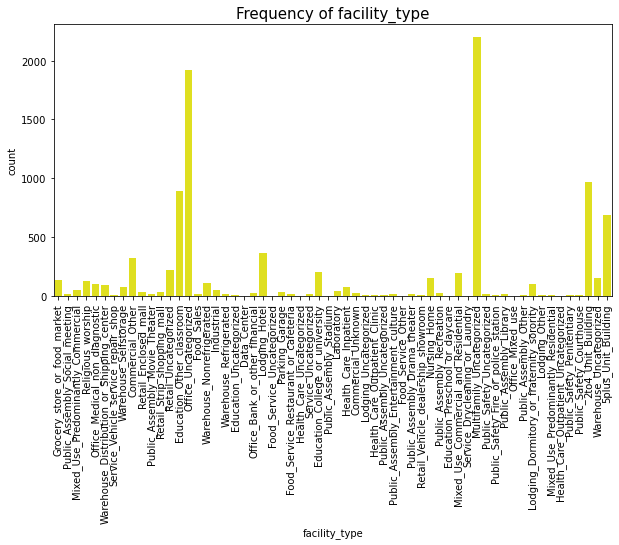

In [12]:
# plot distributions of categorical features in test data
for feature in categorical_features:
    fig = countplot_features(df_test, feature=feature, title = "Frequency of "+ feature, color='yellow')

## Considedring only the non temmperature features 

In [13]:
df_non_temp = df_train[['State_Factor', 'building_class', 'facility_type', 'Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'site_eui']]
df_non_temp.head()

,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,site_eui
0,State_1,Commercial,Grocery_store_or_food_market,1,61242.0,1942.0,11.0,2.4,248.682615
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,1,274000.0,1955.0,45.0,1.8,26.500150
2,State_1,Commercial,Retail_Enclosed_mall,1,280025.0,1951.0,97.0,1.8,24.693619
3,State_1,Commercial,Education_Other_classroom,1,55325.0,1980.0,46.0,1.8,48.406926
4,State_1,Commercial,Warehouse_Nonrefrigerated,1,66000.0,1985.0,100.0,2.4,3.899395


## Handling missing data

In [14]:
missing_columns = [col for col in df_non_temp.columns if df_non_temp[col].isnull().any()]
missingvalues_count = df_non_temp.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('New Set Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df .style.background_gradient(cmap="Pastel1")

,New Set Null Values Count
year_built,1837
energy_star_rating,26709


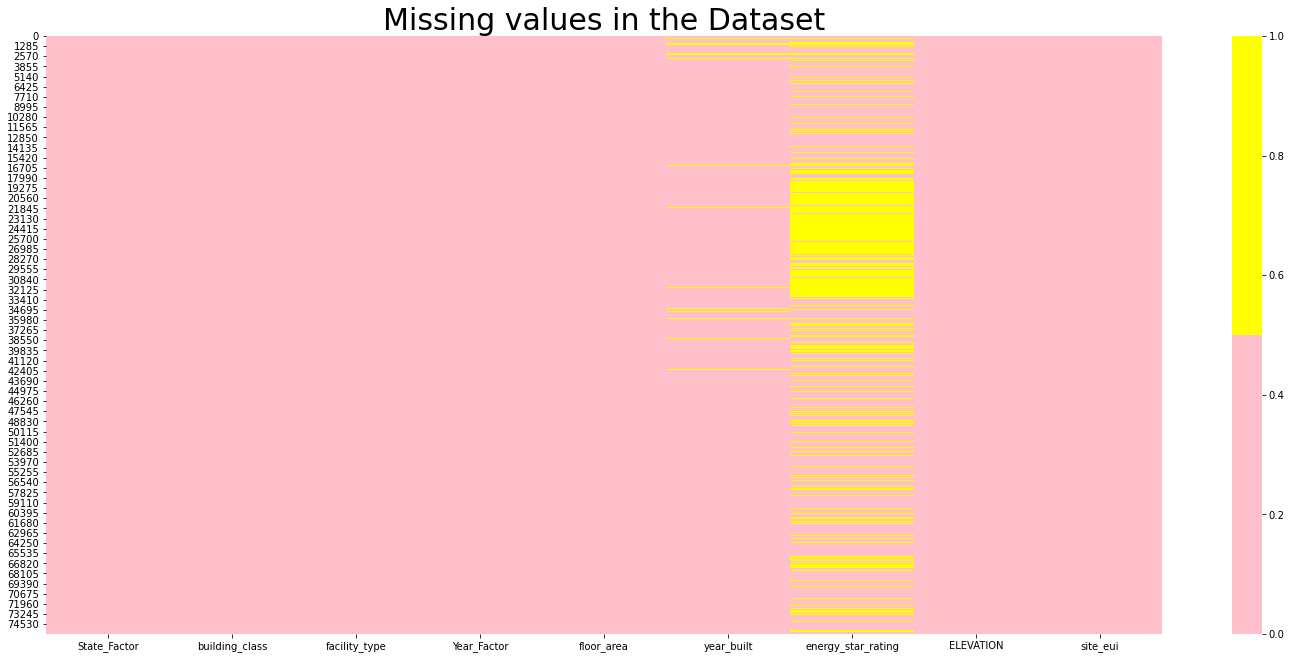

In [15]:
plt.figure(figsize = (25,11))
sns.heatmap(df_non_temp.isna().values, cmap = ['pink','yellow'], xticklabels=df_non_temp.columns)
plt.title("Missing values in the Dataset", size=30);

In [16]:
df_non_temp.shape

(75757, 9)

### As, more than 40% of this features' values are missing, dropping this feature

In [17]:
df_non_temp.drop('energy_star_rating', axis=1, inplace=True)
df_non_temp.head()

C:\Users\Pranali\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,ELEVATION,site_eui
0,State_1,Commercial,Grocery_store_or_food_market,1,61242.0,1942.0,2.4,248.682615
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,1,274000.0,1955.0,1.8,26.500150
2,State_1,Commercial,Retail_Enclosed_mall,1,280025.0,1951.0,1.8,24.693619
3,State_1,Commercial,Education_Other_classroom,1,55325.0,1980.0,1.8,48.406926
4,State_1,Commercial,Warehouse_Nonrefrigerated,1,66000.0,1985.0,2.4,3.899395


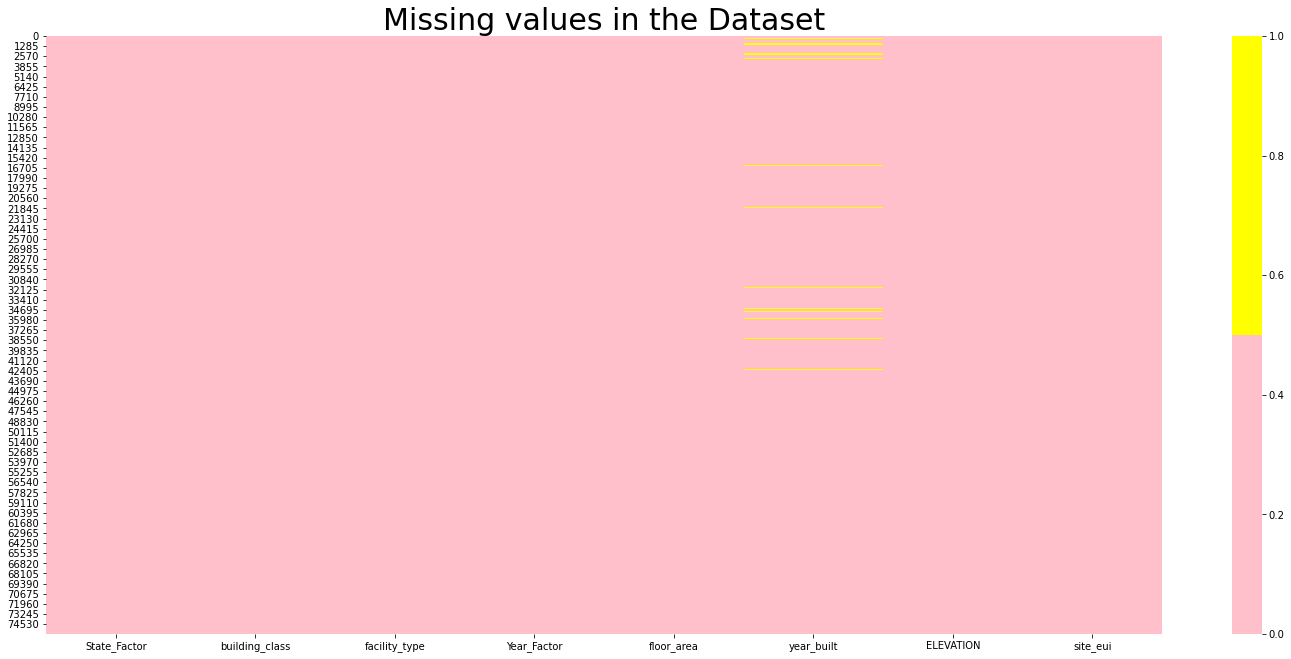

In [18]:
plt.figure(figsize = (25,11))
sns.heatmap(df_non_temp.isna().values, cmap = ['pink','yellow'], xticklabels=df_non_temp.columns)
plt.title("Missing values in the Dataset", size=30);

## Filling the missing values in year_built with the mode

In [2]:
# fill in the missing values with the corresponding year factor value

In [23]:
df_non_temp['year_built'].fillna(df_non_temp['year_built'].mode()[0], inplace=True)
# df_non_temp['year_built'] = df_non_temp['year_built'].fillna(1927.0)

C:\Users\Pranali\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
df_non_temp['year_built'].isna().sum()
# df_non_temp['year_built'].mode()

0

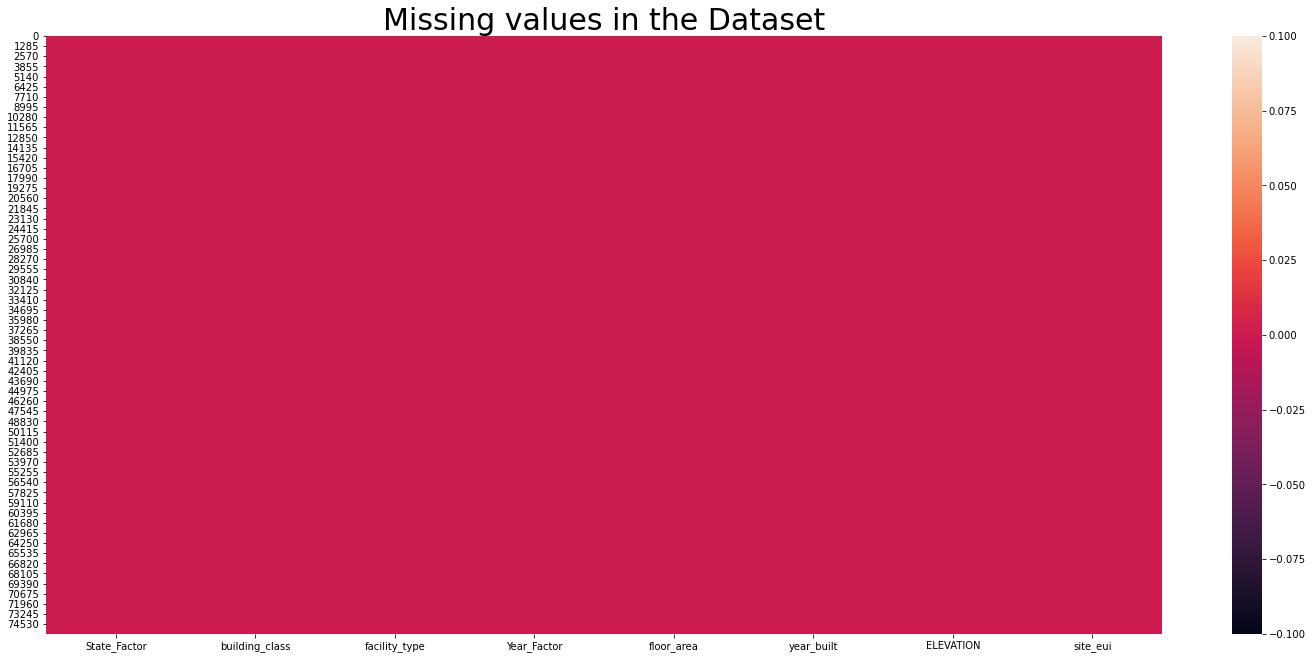

In [26]:
plt.figure(figsize = (25,11))
sns.heatmap(df_non_temp.isna().values, xticklabels=df_non_temp.columns)
plt.title("Missing values in the Dataset", size=30);

## Label Encoding 

In [31]:
le = LabelEncoder()

df_non_temp['State_Factor']= le.fit_transform(df_non_temp['State_Factor']).astype("uint8")
# test['State_Factor']= le.fit_transform(test['State_Factor']).astype("uint8")

df_non_temp['building_class']= le.fit_transform(df_non_temp['building_class']).astype("uint8")
# test['building_class']= le.fit_transform(test['building_class']).astype("uint8")

df_non_temp['facility_type']= le.fit_transform(df_non_temp['facility_type']).astype("uint8")
# test['facility_type']= le.fit_transform(test['facility_type']).astype("uint8")

<ipython-input-31-56da2434b87b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_temp['State_Factor']= le.fit_transform(df_non_temp['State_Factor']).astype("uint8")
<ipython-input-31-56da2434b87b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_temp['building_class']= le.fit_transform(df_non_temp['building_class']).astype("uint8")
<ipython-input-31-56da2434b87b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [33]:
df_non_temp.head()

,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,ELEVATION,site_eui
0,0,0,13,1,61242.0,1942.0,2.4,248.682615
1,0,0,55,1,274000.0,1955.0,1.8,26.500150
2,0,0,48,1,280025.0,1951.0,1.8,24.693619
3,0,0,6,1,55325.0,1980.0,1.8,48.406926
4,0,0,56,1,66000.0,1985.0,2.4,3.899395


1. start with linear regression
2. RMSE - models specific to this
3. Should test data also be cleansed?
4. Learn about XGBoost